<a href="https://colab.research.google.com/github/dmoste/DATA608/blob/master/dmoste_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
from zipfile import ZipFile
from urllib.request import urlopen

# Using urllib, zipfile, and io to read in the data set (it was too large for my computer memory to handle)
r = urlopen('https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v8_csv.zip').read()
file = ZipFile(io.BytesIO(r))
pluto_csv = file.open('pluto_20v8.csv')
nyc = pd.read_csv(pluto_csv, low_memory = False)

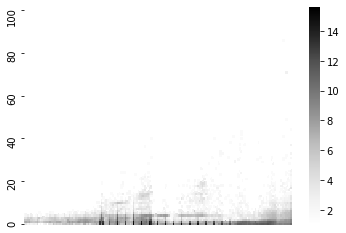

In [216]:
# Basic cleaning to get only the desired years and buildings that have more than 0 floors
nyc = nyc[(nyc['yearbuilt'] > 1850) & (nyc['yearbuilt'] < 2020) & (nyc['numfloors'] != 0)]

# Defining a few key values
year_min = int(nyc['yearbuilt'].min())
year_max = int(nyc['yearbuilt'].max())
floors_max = int(nyc['numfloors'].max())

yearBuilt = pd.cut(nyc['yearbuilt'], np.linspace(year_min, year_max, year_max-year_min))
numFloors = pd.cut(nyc['numfloors'], np.linspace(1, floors_max, floors_max-1))
#numFloors = pd.cut(nyc['numfloors'], [5,10,15,20,25,30,35,40,45,50,60,70,80,90,100,120])

cnts = nyc.groupby([numFloors, yearBuilt])['bbl'].count().unstack().fillna(0).values
cnts[cnts == 0] = 1
cnts = np.log2(cnts)

plt = sns.heatmap(cnts, cmap='Greys', mask=(cnts==0), xticklabels=False, yticklabels=20)
plt.invert_yaxis()

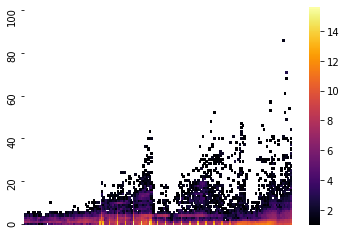

In [217]:
plt = sns.heatmap(cnts, cmap='inferno', mask=(cnts==0), xticklabels=False, yticklabels=20)
plt.invert_yaxis()

In [ ]:
nyc = nyc[(nyc['yearbuilt'] > 1850) & (nyc['yearbuilt'] < 2020) & (nyc['numfloors'] != 0)]
nyc.astype({'yearbuilt': 'int32'})

buildings = {}
records = {'year':[],
           'floors':[],
           'observations':[]}

for year in range(1850,2021):
  if year%10 == 0:
    print(year)
  buildings[year] = {}
  df = nyc[nyc['yearbuilt'] == year]
  for index, building in df.iterrows():
    floors = building['numfloors']
    if floors not in buildings[year].keys():
      buildings[year][floors] = 1
    else:
      buildings[year][floors] += 1
  
  for floors in buildings[year]:
    records['year'].append(year)
    records['floors'].append(floors)
    observations = np.log(buildings[year][floors])
    records['observations'].append(observations)

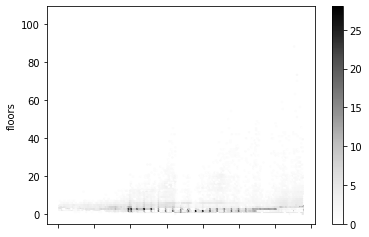

In [185]:
df = pd.DataFrame(records)
ax = df.plot.hexbin(x='year',
                    y='floors',
                    C='observations',
                    reduce_C_function=np.sum,
                    gridsize=170,
                    cmap="Greys")